In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./steam.csv")

1997       1
1998       1
1999       2
2000       2
2001       4
2002       1
2003       3
2004       6
2005       6
2006      48
2007      93
2008     145
2009     305
2010     238
2011     239
2012     320
2013     418
2014    1555
2015    2597
2016    4361
2017    6357
2018    8160
2019    2213
Name: release_date, dtype: int64
['1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006'
 '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019']
[   1    1    2    2    4    1    3    6    6   48   93  145  305  238
  239  320  418 1555 2597 4361 6357 8160 2213]


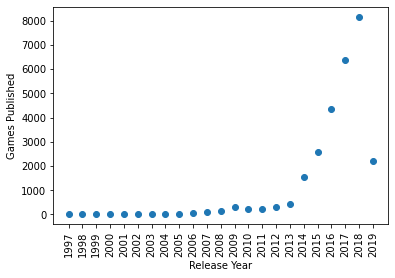

In [3]:
#Number of titles sold per year

dates = data["release_date"].str[:4].value_counts()
print(dates.sort_index())
print(dates.sort_index().index.values)
print(dates.sort_index().to_numpy())
# print(data["release_date"].str[:4].to_numpy())

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel("Release Year")
ax.set_ylabel("Games Published")
ax = plt.scatter(dates.sort_index().index.values, dates.sort_index().to_numpy())
plt.xticks(rotation=90)

# plt.show()
plt.savefig("GamesPublishedByYear.png", dpi=300, bbox_inches = 'tight')



Big Fish Games                212
Strategy First                136
Ubisoft                       111
THQ Nordic                     98
Square Enix                    97
Sekai Project                  96
Choice of Games                94
1C Entertainment               88
Dagestan Technology            88
SEGA                           78
Degica                         77
Plug In Digital                72
KISS ltd                       71
KOEI TECMO GAMES CO., LTD.     71
Slitherine Ltd.                71
AGM PLAYISM                    69
Artifex Mundi                  67
Buka Entertainment             66
Devolver Digital               65
Atriagames                     64
Name: publisher, dtype: int64


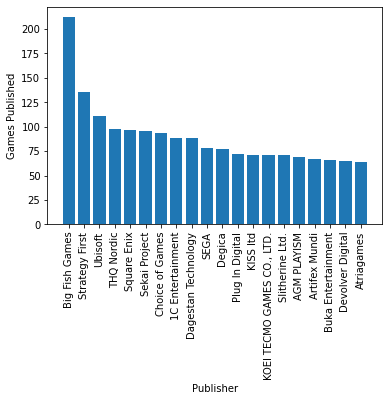

In [4]:
#Most prolific publishers

pubs = data["publisher"].value_counts()[:20]
print(pubs)

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel("Publisher")
ax.set_ylabel("Games Published")
ax = plt.bar(pubs.index.values, pubs.to_numpy())
plt.xticks(rotation=90)

plt.savefig("MostProlificPublishers.png", dpi=300, bbox_inches = 'tight')


In [5]:
#Most "profitable" publishers

#Sum of the product of owners and price for each game for each publisher

#Extract columns
df1 = data[["name", "publisher", "owners", "price"]]

#Replace "owners" with the mid point of the acquired value
import re
def midPoint(x):
  lowHigh = re.split("-", x)
  # return lowHigh[0], lowHigh[1]
  return (int(lowHigh[0]) + int(lowHigh[1]))/2

df1['owners'] = df1['owners'].apply(midPoint)
print(df1)

df1["total"] = df1['owners'] * df1['price']

print(df1[["name", "total"]].sort_values('total'))

                             name             publisher      owners  price
0                  Counter-Strike                 Valve  15000000.0   7.19
1           Team Fortress Classic                 Valve   7500000.0   3.99
2                   Day of Defeat                 Valve   7500000.0   3.99
3              Deathmatch Classic                 Valve   7500000.0   3.99
4       Half-Life: Opposing Force                 Valve   7500000.0   3.99
...                           ...                   ...         ...    ...
27070             Room of Pandora           SHEN JIAWEI     10000.0   2.09
27071                   Cyber Gun      BekkerDev Studio     10000.0   1.69
27072            Super Star Blast           EntwicklerX     10000.0   3.99
27073  New Yankee 7: Deer Hunters  Alawar Entertainment     10000.0   5.19
27074                   Rune Lord  Alawar Entertainment     10000.0   5.19

[27075 rows x 4 columns]
                                   name         total
7290   Emporea: Real

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[3.37425000e+08 3.37425000e+08 3.38808250e+08 3.92679550e+08
 3.93664700e+08 3.95871250e+08 4.08291800e+08 4.24340900e+08
 4.68311450e+08 5.00400950e+08 5.51701300e+08 6.10014150e+08
 6.24765000e+08 6.40981400e+08 7.00600250e+08 8.56592250e+08
 8.67822700e+08 1.29034015e+09 1.37181000e+09 2.02425000e+09]


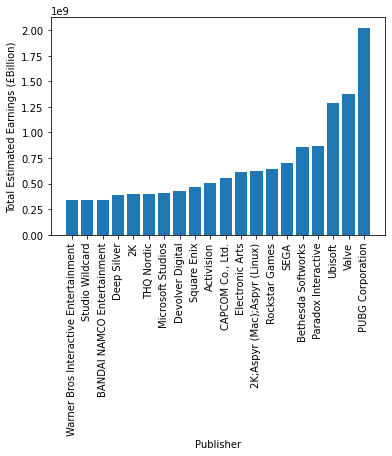

In [6]:
# print(df1[["publisher", "total"]].sort_values('total'))

# print(df1.groupby('publisher')['total'].sum().sort_values().tail(20))
df2 = df1.groupby('publisher')['total'].sum().sort_values().tail(20)
df2.index
print(df2.values)

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel("Publisher")
ax.set_ylabel("Total Estimated Earnings (£Billion)")
ax = plt.bar(df2.index, df2.values)
plt.xticks(rotation=90)

plt.savefig("HighestEarningPubslishers.png", dpi=300, bbox_inches = 'tight')

In [7]:
#Find most important attributes to determine sales

from sklearn.linear_model import LogisticRegression

data = pd.read_csv("./steam.csv")
data['owners'] = data['owners'].apply(midPoint)
y = data['owners'] * data['price']
# data = data.drop(['owners', 'price', 'appid', 'name'], axis=1) #Sensible removals
# data = data.drop(['categories', 'steamspy_tags'], axis=1)


In [8]:
#Kills my fuckign computer

# col = list(data.columns)
# for i in range(len(data.columns)):
#   print("Working on columns: ",col)
#   accuracy = []
#   for i in col:
#     print("Remove: ",i)
#     reduced = pd.get_dummies(data=data[col].loc[:, data[col].columns != i])
#     regr = LogisticRegression(random_state=0).fit(reduced, y)
#     accuracy.append(regr.score(reduced, y))
#     print("Accuracy: ", accuracy[-1])
#   print("Popped: ",col[accuracy.index(max(accuracy))])
#   print()
#   col.pop(accuracy.index(max(accuracy)))

In [9]:
#Most popular categories
import re

cat = data['categories']
catCol = []
catMat = []
# index = 0

for i in cat:
    for x in re.finditer(r'([A-Z]|[a-z]| |-)*', str(i)):
        new = True
        for i in catCol:
            # print("x.group():", x.group())
            # print("i:", i)
            if x.group() == i:
                # print("YES")
                new = False
        
        if (new) and (x.group() != ""):
            catCol.append(x.group())
            
print(catCol)
print()

for i in cat:
    row = [0] * len(catCol)
    for x in re.finditer(r'([A-Z]|[a-z]| |-)*', str(i)):
        if (x.group() != ""):
            row[catCol.index(x.group())] = 1
    catMat.append(row)
    # print(row)
    
# print(catMat)
    
    
catDF = pd.DataFrame(columns = catCol, data = catMat)

['Multi-player', 'Online Multi-Player', 'Local Multi-Player', 'Valve Anti-Cheat enabled', 'Single-player', 'Steam Cloud', 'Steam Achievements', 'Steam Trading Cards', 'Captions available', 'Partial Controller Support', 'Includes Source SDK', 'Cross-Platform Multiplayer', 'Stats', 'Commentary available', 'Includes level editor', 'Steam Workshop', 'In-App Purchases', 'Co-op', 'Full controller support', 'Steam Leaderboards', 'SteamVR Collectibles', 'Online Co-op', 'Shared', 'Split Screen', 'Local Co-op', 'MMO', 'VR Support', 'Mods', 'Mods ', 'require HL', 'Steam Turn Notifications']



In [10]:
catDF

,Multi-player,Online Multi-Player,Local Multi-Player,Valve Anti-Cheat enabled,Single-player,Steam Cloud,Steam Achievements,Steam Trading Cards,Captions available,Partial Controller Support,...,Online Co-op,Shared,Split Screen,Local Co-op,MMO,VR Support,Mods,Mods,require HL,Steam Turn Notifications
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27071,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27072,1,0,0,0,1,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
27073,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
catDF.sum(axis=0).sort_values()

Mods                              1
require HL                        1
Mods                              2
Includes Source SDK              35
SteamVR Collectibles             40
Steam Turn Notifications         63
Valve Anti-Cheat enabled         94
Commentary available            144
VR Support                      231
MMO                             421
In-App Purchases                690
Captions available              721
Steam Workshop                  897
Includes level editor          1036
Local Co-op                    1059
Online Co-op                   1071
Cross-Platform Multiplayer     1081
Local Multi-Player             1615
Co-op                          1721
Stats                          1878
Shared                         2152
Split Screen                   2152
Online Multi-Player            2487
Steam Leaderboards             3439
Multi-player                   3974
Partial Controller Support     4234
Full controller support        5695
Steam Cloud                 

In [12]:
# Most popular categories by year

def mostPopByYear(Year):
    cat = data.loc[data["release_date"].str[:4] == Year]

    # print(cat)

    cat = cat['categories']
    catCol = []
    catMat = []
    # index = 0

    for i in cat:
        for x in re.finditer(r'([A-Z]|[a-z]| |-)*', str(i)):
            new = True
            for i in catCol:
                # print("x.group():", x.group())
                # print("i:", i)
                if x.group() == i:
                    # print("YES")
                    new = False

            if (new) and (x.group() != ""):
                catCol.append(x.group())

    # print(catCol)
    print()

    for i in cat:
        row = [0] * len(catCol)
        for x in re.finditer(r'([A-Z]|[a-z]| |-)*', str(i)):
            if (x.group() != ""):
                row[catCol.index(x.group())] = 1
        catMat.append(row)
        # print(row)

    # print(catMat)


    catDF = pd.DataFrame(columns = catCol, data = catMat)
    
    print(catDF.sum(axis=0).sort_values()[-3:])

In [13]:
for i in range(1997, 2020):
    print(i)
    mostPopByYear(str(i))
    print()

1997

Single-player          1
Multi-player           1
Steam Trading Cards    1
dtype: int64

1998

Online Multi-Player         1
Steam Cloud                 1
Valve Anti-Cheat enabled    1
dtype: int64

1999

Single-player               1
Multi-player                2
Valve Anti-Cheat enabled    2
dtype: int64

2000

Multi-player                2
Online Multi-Player         2
Valve Anti-Cheat enabled    2
dtype: int64

2001

Local Multi-Player          1
Valve Anti-Cheat enabled    1
Single-player               3
dtype: int64

2002

Single-player    1
dtype: int64

2003

Steam Cloud      1
Multi-player     2
Single-player    2
dtype: int64

2004

Includes Source SDK    3
Single-player          4
Multi-player           4
dtype: int64

2005

Commentary available    1
Multi-player            1
Single-player           6
dtype: int64

2006

Steam Trading Cards    10
Multi-player           26
Single-player          46
dtype: int64

2007

Steam Cloud      26
Multi-player     50
Single-playe

In [14]:
##Would do recommender systems, collaborative filtering methods etc, but this  requires access to private user information

In [15]:
#Regression - hmm

In [16]:
# # Pearson Regression - FInd matrix of all different variables.

# from sklearn import linear_model
# from scipy.stats import pearsonr

# data = pd.read_csv("./steam.csv")
# print("Pearson Correlation: ", pearsonr(data['developer'], data["publisher"]))

#Won't work because pearson requires numeric variables, all my data is categoric

In [17]:

data = pd.read_csv("./steam.csv")

In [18]:
data = pd.read_csv("./steam.csv")

data['owners'] = data['owners'].apply(midPoint)
total = data['owners'] * data['price']
print(total)
data = data.drop(['owners', 'price'], axis=1)

# SelectKBest(chi2, k=5).fit_transform(data, total)
# SelectKBest(chi2, k=5).transform(data)

0        107850000.0
1         29925000.0
2         29925000.0
3         29925000.0
4         29925000.0
            ...     
27070        20900.0
27071        16900.0
27072        39900.0
27073        51900.0
27074        51900.0
Length: 27075, dtype: float64


In [19]:
#Convert all to one hot encodings

import re

cat = data['categories']
catCol = []
catMat = []
# index = 0

for i in cat:
    for x in re.finditer(r'([A-Z]|[a-z]| |-)*', str(i)):
        new = True
        for i in catCol:
            # print("x.group():", x.group())
            # print("i:", i)
            if x.group() == i:
                # print("YES")
                new = False
        
        if (new) and (x.group() != ""):
            catCol.append(x.group())
            
print(catCol)
print()

for i in cat:
    row = [0] * len(catCol)
    for x in re.finditer(r'([A-Z]|[a-z]| |-)*', str(i)):
        if (x.group() != ""):
            row[catCol.index(x.group())] = 1
    catMat.append(row)
    # print(row)
    
# print(catMat)
    
    
catDF = pd.DataFrame(columns = catCol, data = catMat)
# print(catDF)

['Multi-player', 'Online Multi-Player', 'Local Multi-Player', 'Valve Anti-Cheat enabled', 'Single-player', 'Steam Cloud', 'Steam Achievements', 'Steam Trading Cards', 'Captions available', 'Partial Controller Support', 'Includes Source SDK', 'Cross-Platform Multiplayer', 'Stats', 'Commentary available', 'Includes level editor', 'Steam Workshop', 'In-App Purchases', 'Co-op', 'Full controller support', 'Steam Leaderboards', 'SteamVR Collectibles', 'Online Co-op', 'Shared', 'Split Screen', 'Local Co-op', 'MMO', 'VR Support', 'Mods', 'Mods ', 'require HL', 'Steam Turn Notifications']



In [20]:
oneHot = pd.concat([data, catDF], axis=1, join="inner")
# print(oneHot)

In [21]:
import re

tags = data['steamspy_tags']
tagCol = []
tagMat = []
# index = 0

for i in tags:
    for x in re.finditer(r'([A-Z]|[a-z]| |-)*', str(i)):
        new = True
        for i in tagCol:
            # print("x.group():", x.group())
            # print("i:", i)
            if x.group() == i:
                # print("YES")
                new = False
        
        if (new) and (x.group() != ""):
            tagCol.append(x.group())
            
print(tagCol)
print()

for i in tags:
    row = [0] * len(tagCol)
    for x in re.finditer(r'([A-Z]|[a-z]| |-)*', str(i)):
        if (x.group() != ""):
            row[tagCol.index(x.group())] = 1
    tagMat.append(row)
    # print(row)
    
# print(catMat)
    
    
tagDF = pd.DataFrame(columns = tagCol, data = tagMat)
# print(tagDF)

['Action', 'FPS', 'Multiplayer', 'World War II', 'Sci-fi', 'Classic', 'Singleplayer', 'Puzzle', 'First-Person', 'Free to Play', 'Zombies', 'Co-op', 'MOBA', 'Strategy', 'Shooter', 'Indie', 'Fighting', 'Cyberpunk', 'RTS', 'Hacking', 'Simulation', 'Naval', 'X', 'Turn-Based Strategy', 'Fantasy', 'Tanks', 'Space', 'RPG', 'Animation ', ' Modeling', 'Video Production', 'Open World', 'Competitive', 'Top-Down Shooter', 'Casual', 'Vampire', 'Cult Classic', 'Western', 'Racing', 'Destruction', 'Offroad', 'Adventure', 'Match ', 'Arcade', 'Hidden Object', 'Tower Defense', 'Sniper', 'Stealth', 'Base-Building', 'Villain Protagonist', 'Story Rich', 'Female Protagonist', 'Platformer', 'Comedy', 'Turn-Based', 'Pirates', 'City Builder', 'Sandbox', 'Funny', 'Card Game', 'Hack and Slash', 'Action RPG', 'Atmospheric', 'Post-apocalyptic', 'Tactical', 'Warhammer ', 'K', 'Medieval', 'Historical', 'Horror', 'Rome', 'Star Wars', 'Point ', ' Click', 'Third-Person Shooter', 'Beat ', 'em up', 'Management', 'Driving'

In [22]:
#Gives all the categories for the games

oneHot = pd.concat([catDF, tagDF], axis=1, join="inner")
# oneHot.drop(["name", "appid", ], axis=1)
# print(oneHot)

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(oneHot)
fullClusters = kmeans.cluster_centers_

In [ ]:
# Determine optimum number of clusters -Turned off for now
costs = []
for i in range(1, 101):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(oneHot)
    print(i, kmeans.inertia_)
    costs.append(kmeans.inertia_)
    
plt.plot(range(1, 101), costs)
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.savefig("KMeansPerformance.png", dpi=300, bbox_inches = 'tight')

1 110393.61277931654
2 101200.68458410248
3 96135.31804369166
4 92175.9036522141
5 88823.57023415795
6 86176.31367517532
7 84057.98816822628
8 82643.08466223258
9 80953.12472579192
10 79720.5399498343
11 78785.316480485
12 78026.43366547656
13 77133.74577493893
14 76129.2374813004
15 75218.36809218908
16 74427.99191589137
17 73850.94176901355
18 73189.77345819266
19 72644.51533474826
20 71645.12593828642
21 71431.24991772084
22 71094.19421956553
23 70554.19933807335
24 69701.85200848075
25 69230.80188134074
26 69056.30507707283
27 68391.38289541598
28 68270.96007536202
29 67570.34796486473
30 67228.56020971162


In [ ]:
# plot the cost against K values



In [ ]:
##Gets the mostest closest to each cluster centre
from sklearn.metrics import pairwise_distances_argmin_min

kmeans = KMeans(n_clusters=100, random_state=0).fit(oneHot)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, oneHot)
closest

for i in closest:
    print(data.iloc[i]['name'])

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA(2)

totaldf = pca.fit_transform(preprocessing.normalize(oneHot))
totaldf

In [ ]:
# kmeans = KMeans(n_clusters=100, random_state=0).fit(oneHot)
label = kmeans.fit_predict(totaldf)
centres = kmeans.cluster_centers_
# print(centres)

# plt.scatter(df[:,0], df[:,1], c=label)
# print(df[:,0])

In [ ]:
def scale(col, min, max): #https://stackoverflow.com/questions/58941935/how-to-scale-numpy-matrix-in-python
    range = col.max() - col.min()
    a = (col - col.min()) / range
    return a * (max - min) + min

fig = plt.figure()

ax = fig.add_subplot()

scaledLabel = scale(label, 0, 10000000)
print(label)

ax.scatter(totaldf[:,0], totaldf[:,1], c=label)
ax.scatter(centres[:,0], centres[:,1], c = "black")
# plt.legend()
plt.savefig("PCAGraph.png", dpi=300, bbox_inches = 'tight')

In [ ]:
#Plot the top 100 sellers

#Append owners to totaldf
data = pd.read_csv("./steam.csv")
owners = pd.DataFrame(data = data['owners'].to_numpy().reshape(-1, 1), columns = ['owners'])
# totaldf
bestSellers = pd.concat([pd.DataFrame(totaldf), owners], axis=1, join="inner")
# bestSellers
# data = pd.read_csv("./steam.csv")
data['owners'] = data['owners'].apply(midPoint)
# bestSellers = bestSellers.sort_values('owners')[-100:]
bestSellers

In [ ]:
print(bestSellers[[0,1]])
kmeans = KMeans(n_clusters=100, random_state=0).fit(bestSellers[[0,1]])
label = kmeans.fit_predict(totaldf)
centres = kmeans.cluster_centers_

In [ ]:
# pca = PCA(2)

# df = pca.fit_transform(bestSellers)

# label = kmeans.fit_predict(df)
# centres = kmeans.cluster_centers_



fig = plt.figure()

ax = fig.add_subplot()
# ax.scatter(totaldf[:,0], totaldf[:,1], c=label)
ax.scatter(bestSellers[0], bestSellers[1], c=label)
plt.savefig("PCAGraph2.png", dpi=300, bbox_inches = 'tight')

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(bestSellers[0], bestSellers[1], c=label)
bestSellersNew = bestSellers.sort_values('owners')[-100:]
ax.scatter(centres[:,0], centres[:,1], c = "black")
ax.scatter(bestSellersNew[0], bestSellersNew[1], c='red')
plt.savefig("PCAGraphBestMeans.png", dpi=300, bbox_inches = 'tight')




In [ ]:
from collections import Counter

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, bestSellers[[0,1]])
closestList = []
for i in closest:
    closestList.append(data.iloc[i]['name'])
# print(closestList)

# print(bestSellersNew.index)

clusters = []
for i in bestSellersNew.index:
    # print(i)
    # print(label[i])
    clusters.append(label[i])
occ = Counter(clusters) #Gets the occurrences of each cluster
# print(occ)
print(list(dict(sorted(occ.items(), key=lambda item: item[1])))[-3:])
best = list(dict(sorted(occ.items(), key=lambda item: item[1])))[-3:]
print(list(dict(sorted(occ.items(), key=lambda item: item[1])).values())[-3:])

In [ ]:
#Most frequent Occurrences are: 3, 76, 99, 10

#Closest centre to these clusters are:
clustersDF = pd.DataFrame(clusters)

# max_key = max(occ, key=occ.get)
# print(max_key)

# print("Cluster max_key:")
# print("Centre: ",closestList[max_key])
# print("Items in this cluster:")
# for i in clustersDF.loc[clustersDF[0]==max_key].index.tolist():
#     # print(i)
#     # print(bestSellersNew.iloc[i].name)
#     print(data.iloc[bestSellersNew.iloc[i].name]['name'])
# print()

for i in best:
    print(i)

    print("Cluster:",i)
    print("Centre: ",closestList[i])
    print("Items in this cluster:")
    for j in clustersDF.loc[clustersDF[0]==i].index.tolist():
        # print(i)
        # print(bestSellersNew.iloc[i].name)
        print(data.iloc[bestSellersNew.iloc[j].name]['name'])
    print()

In [ ]:
#Find shared values

for max_key in best: #Using max_key because it's already been defined 
    print()
    #Get the actual rows
    sharedCatData = []
    for i in clustersDF.loc[clustersDF[0]==max_key].index.tolist():
        sharedCatData.append(oneHot.iloc[bestSellersNew.iloc[i].name].tolist())

    sharedCatDF = pd.DataFrame(sharedCatData, columns=oneHot.columns)
    sharedCatDF

    shared = {}
    # i = sharedCatData[0]
    for i in sharedCatData:
        for count in range(len(i)):
            # same = False
            freq = 0
            for j in sharedCatData:
                if (i[count] == j[count]) & (i[count] == 1):
                    freq += 1
            shared[oneHot.columns[count]] = freq


    print(list(dict(sorted(shared.items(), key=lambda item: item[1])))[-10:])
    print(list(dict(sorted(shared.items(), key=lambda item: item[1])).values())[-10:])  #Should use similar code for cluster selection